# S&P 500 - Volatility
This code analyzes the most volatile stocks

for part of my code, i used data from the website https://www.learnpythonwithrune.org/calculate-the-volatility-of-historic-stock-prices-with-pandas-and-python/

In [10]:
# import modules
import csv
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import copy

"""
import pandas_datareader as pdr
import datetime as dt
ticker = "AAPL"
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)
data = pdr.get_data_yahoo(ticker, start, end)
print(data.head())
"""

'\nimport pandas_datareader as pdr\nimport datetime as dt\nticker = "AAPL"\nstart = dt.datetime(2019, 1, 1)\nend = dt.datetime(2020, 12, 31)\ndata = pdr.get_data_yahoo(ticker, start, end)\nprint(data.head())\n'

In [11]:
def non_empty_data():
    symbol_list = [i.strip() for i in open("symbol_list.txt", "r").readlines()]
    #print(symbol_list)
    comp_list = []
    #print(symbol_list)
    for i in symbol_list:
        file_name = "stock_data/"+str(i.strip())+"_data.csv"
        df = pd.read_csv(file_name)
        is_empty = df.empty

        if not is_empty:
            comp_list.append(i.strip())
    #print(len(comp_list))
    return comp_list

In [12]:
#store the names of the companies that have data from the S&P500
comp_names = non_empty_data()
#vi_list = []

In [13]:
def company_data(comp_name):
    #for i in comp_names:
    data = pd.read_csv("stock_data/"+str(comp_name)+"_data.csv")
    #print(data.head())
    return data
#company_data()

In [14]:
def company_volatility(comp_names):
    volatility_list = []
    
    for i in comp_names:
        data = company_data(i)
        data['Log returns'] = np.log(data['Close']/data['Close'].shift())
        data['Log returns'].std()
        volatility = data['Log returns'].std()*252**.5
        #str_vol = str(round(volatility, 4)*100)
        float_vol = round(volatility, 4)*100
        volatility_list.append(float_vol)
    return volatility_list

In [15]:
# Python program to find N largest
# element from given list of integers
# Function returns N largest elements

vol_list = company_volatility(comp_names)

def max_vol_stock_list(vol_list, comp_names, N=10, Top_Names = False, Top_Vol = False, Top_N_and_V = False):
    temp_list = copy.deepcopy(vol_list)
    final_list = []
    
    fin_list = []
    
    final_name = []
    
    for i in range(0, N):
        max1 = float(0.0)

        for j in range(len(temp_list)):	
            if float(temp_list[j]) > max1:
                max1 = temp_list[j];

        temp_list.remove(max1);
        final_list.append(max1)
        
    #getting the real index of the top volatiles values 
    for i in final_list:
        for j in vol_list:
            if i == j:
                index_vol = vol_list.index(j)
                fin_list.append(index_vol)
    if Top_Vol == True: 
        return fin_list
    
    if Top_Names == True:
        for i in fin_list:
            final_name.append(comp_names[i])
        return final_name
    
    if Top_N_and_V == True:
        print("Symbol  :  Volatility")
        for i in fin_list:
            name = comp_names[i]
            vol = round(vol_list[i], 2)
            print(str(name)+" :  "+ str(vol))
            
# Calling the function
#max_vol_stock_list(vol_list, comp_names, 10)
max_vol_stock_list(vol_list, comp_names, N=10, Top_Names = False, Top_Vol = False, Top_N_and_V = True)

Symbol  :  Volatility
COL :  123.57
HCP :  100.31
XL :  83.39
PCG :  76.28
SIG :  75.72
APA :  70.5
NCLH :  69.37
CCL :  65.68
RRC :  65.56
FLR :  64.25


In [16]:
def stock_vol_values(N=10):
    max_vol_stock_list(vol_list, comp_names, N)
    max_vol_stock_list(vol_list, comp_names, N=10, Top_Names = True, Top_Vol = False, Top_N_and_V = False):

    

SyntaxError: invalid syntax (<ipython-input-16-f38d8d991b1f>, line 3)

In [ ]:
def company_volatility(comp_names):
    volatility_list = []
    
    for i in comp_names:
        data = company_data(i)
        data['Log returns'] = np.log(data['Close']/data['Close'].shift())
        data['Log returns'].std()
        volatility = data['Log returns'].std()*252**.5
        #str_vol = str(round(volatility, 4)*100)
        float_vol = round(volatility, 4)*100
        volatility_list.append(float_vol)
    return volatility_list

<ipython-input-27-aca1389c4998>:29: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=50, alpha=0.6, color="b")


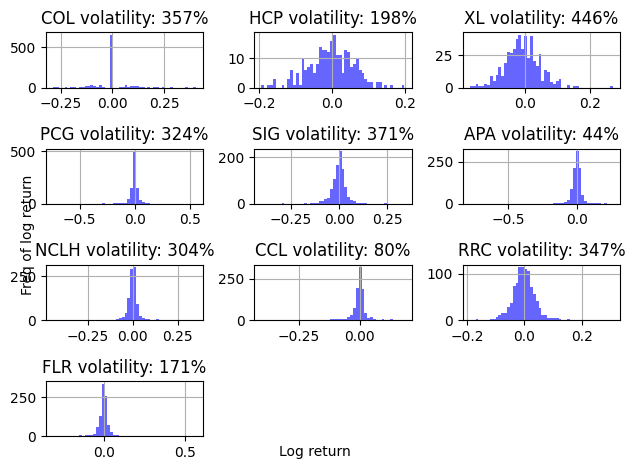

In [27]:
def top_graph(N = 4):
    top_names = max_vol_stock_list(vol_list, comp_names, N, Top_Names = True, Top_Vol = False, Top_N_and_V = False)
    top_vol = max_vol_stock_list(vol_list, comp_names, N, Top_Names = False, Top_Vol = True, Top_N_and_V = False)

    #a = N
    #if a%2 !=0:
    #    a = a+1
    #size = round(N)
    #size = int(round(a**0.5,0))
    #fig, ax = plt.subplots(size, size)
    #columns = [str(i)+" volatility: " + str(top_vol[top_names.index(i)]) + "%" for i in top_names]
    #print(columns)
    
    header_list = [str(i)+" volatility: " + str(top_vol[top_names.index(i)]) + "%" for i in top_names]
    df = pd.DataFrame(columns = header_list)
    
    for i in range(0,len(top_names)):
        name = top_names[i]
        #print(name)
        data = pd.read_csv("stock_data/"+str(name)+"_data.csv")
        #print(data)
        #data['Log returns'] = np.log(data['Close']/data['Close'].shift())
        
        df[header_list[i]] = np.log(data['Close']/data['Close'].shift())
    #df.head()               
                    
    fig, ax = plt.subplots()

    df.hist(ax=ax, bins=50, alpha=0.6, color="b")
    #ax.set_xlabel("Log return")
    #ax.set_ylabel("Freq of log return")
    #ax.set_title(str(i)+" volatility: " + str_vol + "%")
    #plt.xlabel("izi")
    fig.text(0.5, 0.04, 'Log return', ha='center')
    fig.text(0.04, 0.5, 'Freq of log return', va='center', rotation='vertical')
    fig.tight_layout()
    plt.show()
    
top_graph(N = 10)  

In [ ]:
def lets_trade():
    a = input("Hello... Do you want to learn about the market? : Yes or No")
    if a.strip().lower() == "yes":
        print("awesome! Do you want to do short term or long term trading?")
        b = input("Please enter only <long> or <short> depending on your answer!")
        if b.strip().lower() == "long":
            print("Sorry, we are not yet equipped to share information about long term trading with you.")
        if b.strip().lower() == "short":
            print("We can provide you with a list of the top volatiles stock in the market...")
            c = input("Would you like that? ...Please answer yes or no")
            if c.strip().lower() == "no":
                print("Alright! Soound good! Have a great day")
            if c.strip().lower() == "yes":
                print("Perfect! Now tell us... How many companies would you like to know about? ")
                d = input("Please choose a number between 1 and 50")
                
                if d.strip().isnumeric() == True and int(d.strip()) < 51:
                    z = max_vol_stock_list(vol_list, comp_names, N=int(d.strip()), Top_Names = False, Top_Vol = False, Top_N_and_V = True)
                    print("Would like to have a graph of the volatility distribution of those stock?")
                    e = input("Please answer yes or no...")
                    
                    if e.strip().lower() == "yes":
                        top_graph(int(d.strip()))
lets_trade()                   
                